In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

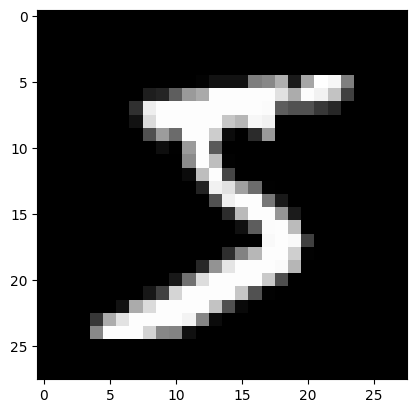

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [16]:
type(y_train_onehot)


numpy.ndarray

In [17]:
y_train_onehot.shape

(60000, 10)

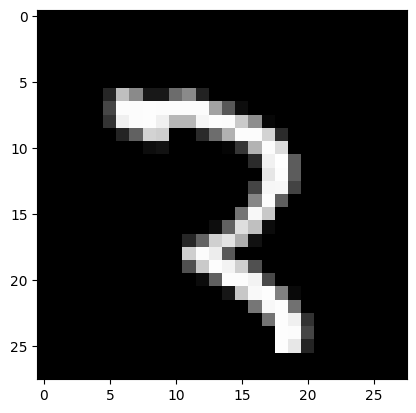

In [18]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [21]:
model = keras.Sequential()
# Write your code here
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),activation='relu'))
model.add(layers.Conv2D(filters=64,kernel_size=(5,5),strides=(1,1),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(15,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 20)                128020    
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                        

In [23]:
# Choose the appropriate parameters
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 19s 7ms/step - loss: 0.2311 - accuracy: 0.9268 - val_loss: 0.0751 - val_accuracy: 0.9785
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0617 - accuracy: 0.9821 - val_loss: 0.0604 - val_accuracy: 0.9814
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0428 - accuracy: 0.9863 - val_loss: 0.0425 - val_accuracy: 0.9859
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0320 - accuracy: 0.9903 - val_loss: 0.0419 - val_accuracy: 0.9871
Epoch 5/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0248 - accuracy: 0.9924 - val_loss: 0.0480 - val_accuracy: 0.9863


In [26]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 9s 10ms/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0324 - val_accuracy: 0.9898
Epoch 2/5
938/938 [==============================] - 9s 10ms/step - loss: 0.0164 - accuracy: 0.9947 - val_loss: 0.0320 - val_accuracy: 0.9903
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0130 - accuracy: 0.9961 - val_loss: 0.0400 - val_accuracy: 0.9892
Epoch 4/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0105 - accuracy: 0.9966 - val_loss: 0.0380 - val_accuracy: 0.9908
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0107 - accuracy: 0.9965 - val_loss: 0.0333 - val_accuracy: 0.9923


In [27]:
metrics = pd.DataFrame(model.history.history)

In [28]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.020582,0.993450,0.032375,0.9898
1,0.016421,0.994700,0.031974,0.9903
2,0.012951,0.996083,0.040001,0.9892
3,0.010502,0.996600,0.037981,0.9908
4,0.010655,0.996450,0.033270,0.9923


<Axes: >

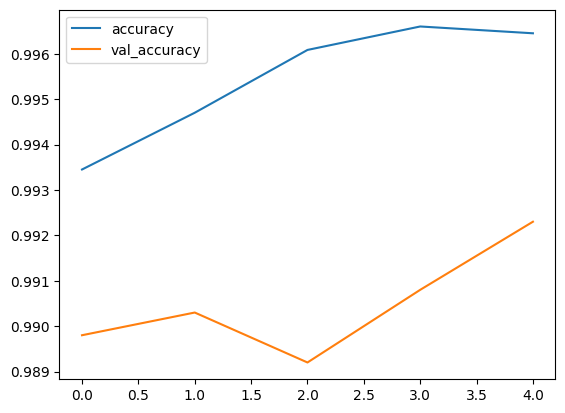

In [29]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

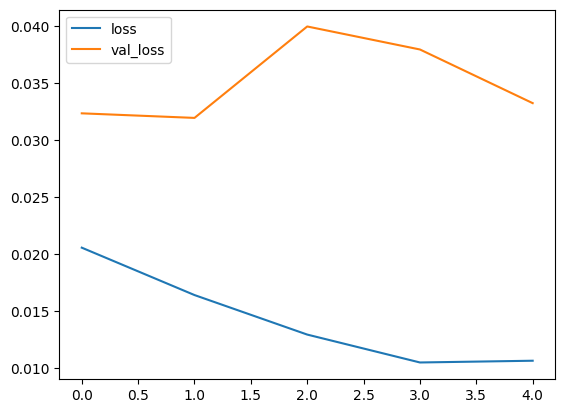

In [30]:
metrics[['loss','val_loss']].plot()

In [31]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 1s 3ms/step


In [32]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 974    0    2    0    0    0    1    0    2    1]
 [   0 1129    1    1    0    0    0    3    1    0]
 [   0    0 1025    0    0    0    1    6    0    0]
 [   0    0    2  999    0    7    0    0    2    0]
 [   0    0    2    0  971    0    3    0    2    4]
 [   0    0    0    3    0  888    1    0    0    0]
 [   2    2    1    0    1    1  949    0    2    0]
 [   0    1    2    0    0    0    0 1023    1    1]
 [   1    0    1    1    0    2    0    1  966    2]
 [   0    0    0    0    4    2    0    2    2  999]]


In [33]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      1.00      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [35]:
img = image.load_img('imagefive.jpeg')

In [36]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [38]:
img = image.load_img('imagefive.jpeg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [39]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 76ms/step


In [40]:
print(x_single_prediction)

[5]


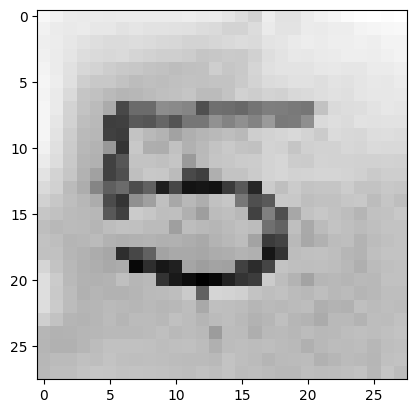

In [41]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [42]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [43]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 18ms/step


In [44]:
print(x_single_prediction)

[5]
